### 2a


 $$\begin{align*}G(s)&= \frac{b_{0}}{a_{2}s^{2} + a_{1}s+ a_{0}} & &\to & G(s)&= \frac{b_{0}/a_{2}}{a_{2}/a_{2}\:s^{2} + a_{1}/a_{2}\:s+ a_{0}/a_{2}} & &\to & G(s)&= \frac{K \omega_{n}^{2}}{s^{2} + 2\zeta \omega_{n}s+ \omega_{n}^{2}} \end{align*}$$
 $$\begin{align*} \omega_{n} &= \sqrt{\frac{a_{0}}{a_{2}}} & K &= \frac{b_{0}}{a_{2} \omega_{n}^{2}} = \frac{b_{0} }{ a_{0}} & \zeta &= \frac{a_{1}}{2a_{2} \omega_{n}} = \frac{a_{1}}{2\sqrt{a_{2}a_{0}} } \end{align*}$$



In [39]:
import sympy as sp 
sp.init_printing()

a_2 = 1
a_1 = 10
a_0 = -200
b_0 = 300

omega_n = sp.sqrt( a_0/a_2 )
K = b_0/a_0
zeta =   a_1/(2*sp.sqrt( a_0*a_2 ))

print( "natural freq:", omega_n )
print( "system gain:",K )
print( "daming factor:", zeta  )


natural freq: 14.142135623731*I
system gain: -1.5
daming factor: -sqrt(2)*I/4


### 2b

In [40]:

print( "daming factor:", zeta  )

daming factor: -sqrt(2)*I/4


### 2c (Taken from my obsidian notes https://github.com/NoLtour/Uni-notes/blob/main/(Year%203)%20Aero%20systems%20control/4%20Response%20of%20dynamic%20systems/dynamic%20system%20response%20time%20metrics.md)

Taking a second order system and applying a step response will produce the oscillatory motion seen above. A valid representation of this is as follows:

$$\begin{align*}
c(t) &= 1 - \frac{1}{\sqrt{1-\zeta^{2}}}e^{-\zeta\omega_{n}t} \sin \left(\omega_{n} t\sqrt{1 - \zeta^{2}} + \arctan \frac{\sqrt{1-\zeta^{2}}}{\zeta} \right)
\end{align*}$$

We'll now use this as our equation for getting each of these metrics from.

#### Peak overshoot

Not so hard, just find where $dc/dt=0$ and then take the first occurance above zero. This looks daunting, till you realise that $\zeta$ and $\omega_{n}$ are constants. Going to skip over most of it:

$$\begin{align*}
c(t) &= 1 - \frac{1}{\sqrt{1-\zeta^{2}}}e^{-\zeta\omega_{n}t} \sin \left(\omega_{n} t\sqrt{1 - \zeta^{2}} + \arctan \frac{\sqrt{1-\zeta^{2}}}{\zeta} \right) \\
&\downarrow\: \text{ Find } \frac{dc}{dx}=0 \text{, then rearrange}\\
\frac{\sqrt{{1-\zeta^{2}}}}{\zeta} &= \tan\left( \omega_{n}t\sqrt{1-\zeta^{2}} +\arctan\frac{\sqrt{1-\zeta^{2}}}{\zeta} \right)\\
&\downarrow\: \text{ Solve for }t\\
t &= \frac{n\pi}{\omega_{n}\sqrt{1-\zeta^{2}}} \:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\: n=1,3,5 ...
\end{align*}$$

After considering that we only care about $n=1$ (first peak), peak time will be:
$$\begin{align*}
T_{p} &= \frac{\pi}{\omega_{n}\sqrt{1-\zeta^{2}}} = \frac{\pi}{\omega_{t}}
\end{align*}$$

We need to get all the things for peak overshoot:

$$\begin{align*}
PO  &= \frac{c_{max}-c_{min}}{c_{final}} \times 100 
\end{align*}$$

 

First $c_{max}$:


$$\begin{align*}  
c(T_{p}) &= 1 - \frac{1}{\sqrt{1-\zeta^{2}}}e^{-\zeta\omega_{n}\frac{\pi}{\omega_{n}\sqrt{1-\zeta^{2}}}} \sin \left(\omega_{n} \frac{\pi}{\omega_{n}\sqrt{1-\zeta^{2}}}\sqrt{1 - \zeta^{2}} + \arctan \frac{\sqrt{1-\zeta^{2}}}{\zeta} \right) \\
c_{max} &= 1 - \frac{1}{\sqrt{1-\zeta^{2}}}e^{-\zeta \frac{\pi}{ \sqrt{1-\zeta^{2}}}} \sin \left(   \pi  + \arctan \frac{\sqrt{1-\zeta^{2}}}{\zeta} \right) \\
\end{align*}$$

Then $c_{min}$:

$$\begin{align*}  
c(0) &= 1 - \frac{1}{\sqrt{1-\zeta^{2}}}e^{-\zeta\omega_{n}0} \sin \left(\omega_{n} 0\sqrt{1 - \zeta^{2}} + \arctan \frac{\sqrt{1-\zeta^{2}}}{\zeta} \right)  \\
c_{min} &= 1 - \frac{1}{\sqrt{1-\zeta^{2}}} \sin \left(\arctan \frac{\sqrt{1-\zeta^{2}}}{\zeta} \right)  \\
 &= 1-1\\
&= 0  \\

\end{align*}$$

Then $c_{total}$:
$$\begin{align*}  
\lim_{t\to\infty} c(t) &= 1 - \frac{1}{\sqrt{1-\zeta^{2}}}e^{-\zeta\omega_{n}t} \sin \left(\omega_{n} t\sqrt{1 - \zeta^{2}} + \arctan \frac{\sqrt{1-\zeta^{2}}}{\zeta} \right)  \\
c_{total} &= 1 - \frac{1}{\sqrt{1-\zeta^{2}}} \\

\end{align*}$$

Finally:

$$\begin{align*}
PO  &= \frac{c_{max}-c_{min}}{c_{final}} \times 100 & &\to & PO  &= \frac{1 - \frac{1}{\sqrt{1-\zeta^{2}}}e^{-\zeta \frac{\pi}{ \sqrt{1-\zeta^{2}}}} \sin \left(   \pi  + \arctan \frac{\sqrt{1-\zeta^{2}}}{\zeta} \right) }{ 1 - \frac{1}{\sqrt{1-\zeta^{2}}}} \times 100 
\end{align*}$$

Ok so just simplify that. I [[it is just that easy|did it in my head]], got this:

$$\begin{align*}
PO &= 100 \exp \left(- \frac{\pi\zeta}{\sqrt{1-\zeta^{2}}}\right)
\end{align*}$$

Easy.

#### Settling time

That can be suitably found after 4 time steps:

$$\begin{align*}
 c(T_{s})=c(4T) &\approx 4\%\text{ of fianl value}
\end{align*}$$

Here:
$$\begin{align*}
T=\frac{1}{\zeta \omega_{n}}
\end{align*}$$

#### Rise time

This is actually REALLY hard analytically, for this case it comes out as about:

$$\begin{align*}
T_{r} &= \frac{1.8}{\omega_{n}}
\end{align*}$$

This is a conservative estimate.


In [ ]:
stuff

### 2f plot 

2.718281828459045


TypeError: Cannot convert complex to float

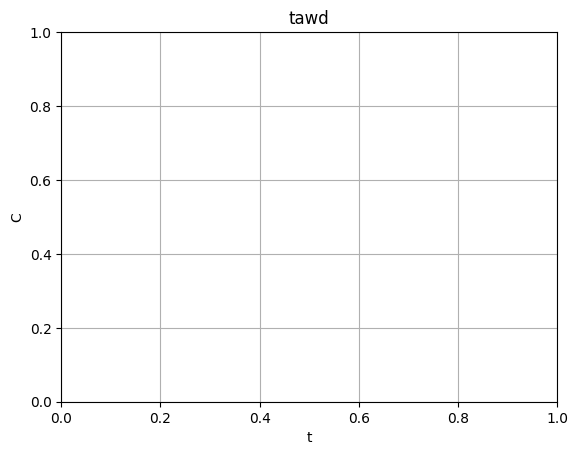

In [53]:
import matplotlib.pyplot as plot 
import numpy as np

plot.figure(87443452)
plot.grid()

plot.title("tawd" ) 
plot.ylabel( "C" )
plot.xlabel( "t" ) 

Ts = [i * 0.04 for i in range(int(10 / 0.04))]
e = np.e

Cs = []
for t in Ts:
    Cs.append((1 - ((1/sp.sqrt( 1 - zeta*zeta ))) * e**( - zeta*omega_n*t ) * sp.sin( omega_n*t*sp.sqrt(1 - zeta**2) + sp.atan( sp.sqrt(1-zeta**2)/zeta ) ) ).evalf())

print(e)

plot.plot( Ts, Cs )

plot.show()